In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

In [2]:
hao = pd.read_csv('metrics/hao_concat.csv')
tenx = pd.read_csv('metrics/10xpbmc10k_concat.csv')
kotliarov = pd.read_csv('metrics/kotliarov_concat.csv')

In [3]:
df = pd.concat([hao, kotliarov])
df['score'] = 0.4*(df["ASW_label/batch"] + df["graph_conn"])/2 + 0.6*(df["NMI_cluster/label"] + df["ARI_cluster/label"] + df["ASW_label"] + df["isolated_label_silhouette"])/4
df

,ASW_label/batch,graph_conn,ASW_label,NMI_cluster/label,ARI_cluster/label,isolated_label_silhouette,method,reference_time,query_time,data,score
0,0.907703,0.902571,0.605911,0.816097,0.729670,0.596722,multigrate,0,0,Hao-2020,0.774315
1,0.884090,0.911601,0.592911,0.774955,0.651206,0.562602,seurat,0,0,Hao-2020,0.746389
2,0.944618,0.956565,0.545965,0.808280,0.706760,0.553468,totalVI,0,0,Hao-2020,0.772408
3,0.840300,0.908356,0.582185,0.804004,0.656429,0.592701,mofa,0,0,Hao-2020,0.745029
0,0.971518,0.992435,0.556031,0.888860,0.882182,0.542164,totalVI,0,0,Kotliarov-2020,0.823176
1,0.957940,0.993563,0.691650,0.919871,0.913472,0.557054,multigrate,0,0,Kotliarov-2020,0.852608
2,0.945120,0.991104,0.694918,0.909042,0.913448,0.586168,mofa,0,0,Kotliarov-2020,0.852781
3,0.945788,0.912632,0.589508,0.751772,0.686227,0.565185,seurat,0,0,Kotliarov-2020,0.760588


In [4]:
tenx

,graph_conn,ASW_label,NMI_cluster/label,ARI_cluster/label,method,reference_time,query_time,data
0,0.993777,0.605867,0.804092,0.665098,seurat,0,0,10xpbmc10k-2020
1,0.992867,0.655908,0.812518,0.774575,multigrate,0,0,10xpbmc10k-2020
2,0.980192,0.618968,0.770092,0.707662,mofa,0,0,10xpbmc10k-2020


In [5]:
tenx['score'] = 0.4*tenx["graph_conn"] + 0.6*(tenx["NMI_cluster/label"] + tenx["ARI_cluster/label"] + tenx["ASW_label"])/3
tenx

,graph_conn,ASW_label,NMI_cluster/label,ARI_cluster/label,method,reference_time,query_time,data,score
0,0.993777,0.605867,0.804092,0.665098,seurat,0,0,10xpbmc10k-2020,0.812522
1,0.992867,0.655908,0.812518,0.774575,multigrate,0,0,10xpbmc10k-2020,0.845747
2,0.980192,0.618968,0.770092,0.707662,mofa,0,0,10xpbmc10k-2020,0.811421


In [6]:
df = pd.concat([df, tenx])
df

,ASW_label/batch,graph_conn,ASW_label,NMI_cluster/label,ARI_cluster/label,isolated_label_silhouette,method,reference_time,query_time,data,score
0,0.907703,0.902571,0.605911,0.816097,0.729670,0.596722,multigrate,0,0,Hao-2020,0.774315
1,0.884090,0.911601,0.592911,0.774955,0.651206,0.562602,seurat,0,0,Hao-2020,0.746389
2,0.944618,0.956565,0.545965,0.808280,0.706760,0.553468,totalVI,0,0,Hao-2020,0.772408
3,0.840300,0.908356,0.582185,0.804004,0.656429,0.592701,mofa,0,0,Hao-2020,0.745029
0,0.971518,0.992435,0.556031,0.888860,0.882182,0.542164,totalVI,0,0,Kotliarov-2020,0.823176
1,0.957940,0.993563,0.691650,0.919871,0.913472,0.557054,multigrate,0,0,Kotliarov-2020,0.852608
2,0.945120,0.991104,0.694918,0.909042,0.913448,0.586168,mofa,0,0,Kotliarov-2020,0.852781
3,0.945788,0.912632,0.589508,0.751772,0.686227,0.565185,seurat,0,0,Kotliarov-2020,0.760588
0,NaN,0.993777,0.605867,0.804092,0.665098,NaN,seurat,0,0,10xpbmc10k-2020,0.812522
1,NaN,0.992867,0.655908,0.812518,0.774575,NaN,multigrate,0,0,10xpbmc10k-2020,0.845747


In [7]:
df.loc[(df.data == 'Hao-2020'),'data']='Dataset 2\n (CITE)'

In [8]:
df.loc[(df.data == 'Kotliarov-2020'),'data']='Dataset 3\n (CITE)'

In [9]:
df.loc[(df.data == '10xpbmc10k-2020'),'data']='Dataset 1\n (RNA-ATAC)'

In [10]:
df.loc[(df.method == 'mofa'),'method']='MOFA+'

In [11]:
df.loc[(df.method == 'seurat'),'method']='Seurat'

In [12]:
df

,ASW_label/batch,graph_conn,ASW_label,NMI_cluster/label,ARI_cluster/label,isolated_label_silhouette,method,reference_time,query_time,data,score
0,0.907703,0.902571,0.605911,0.816097,0.729670,0.596722,multigrate,0,0,Dataset 2\n (CITE),0.774315
1,0.884090,0.911601,0.592911,0.774955,0.651206,0.562602,Seurat,0,0,Dataset 2\n (CITE),0.746389
2,0.944618,0.956565,0.545965,0.808280,0.706760,0.553468,totalVI,0,0,Dataset 2\n (CITE),0.772408
3,0.840300,0.908356,0.582185,0.804004,0.656429,0.592701,MOFA+,0,0,Dataset 2\n (CITE),0.745029
0,0.971518,0.992435,0.556031,0.888860,0.882182,0.542164,totalVI,0,0,Dataset 3\n (CITE),0.823176
1,0.957940,0.993563,0.691650,0.919871,0.913472,0.557054,multigrate,0,0,Dataset 3\n (CITE),0.852608
2,0.945120,0.991104,0.694918,0.909042,0.913448,0.586168,MOFA+,0,0,Dataset 3\n (CITE),0.852781
3,0.945788,0.912632,0.589508,0.751772,0.686227,0.565185,Seurat,0,0,Dataset 3\n (CITE),0.760588
0,NaN,0.993777,0.605867,0.804092,0.665098,NaN,Seurat,0,0,Dataset 1\n (RNA-ATAC),0.812522
1,NaN,0.992867,0.655908,0.812518,0.774575,NaN,multigrate,0,0,Dataset 1\n (RNA-ATAC),0.845747


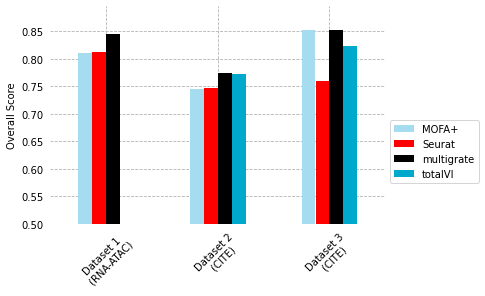

In [15]:
#
df.groupby(['data','method']).sum().unstack().reindex(['Dataset 1\n (RNA-ATAC)', 'Dataset 2\n (CITE)', 'Dataset 3\n (CITE)']).plot(kind='bar', y='score', color=["#a6dcef","red","black","#00a8cc"], zorder=3).legend(bbox_to_anchor=(1, 0.5))
plt.ylabel("Overall Score")
plt.xlabel("")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=True)
plt.grid('on', linestyle='--', zorder=0)
plt.ylim(0.5)
plt.xticks([0, 1, 2], ['Dataset 1\n (RNA-ATAC)', 'Dataset 2\n (CITE)', 'Dataset 3\n (CITE)'], rotation=45)
plt.savefig("scores_all_barplot_v5.png", bbox_inches='tight', dpi=200)